In [764]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

<AxesSubplot:title={'center':'item type vs sales price'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

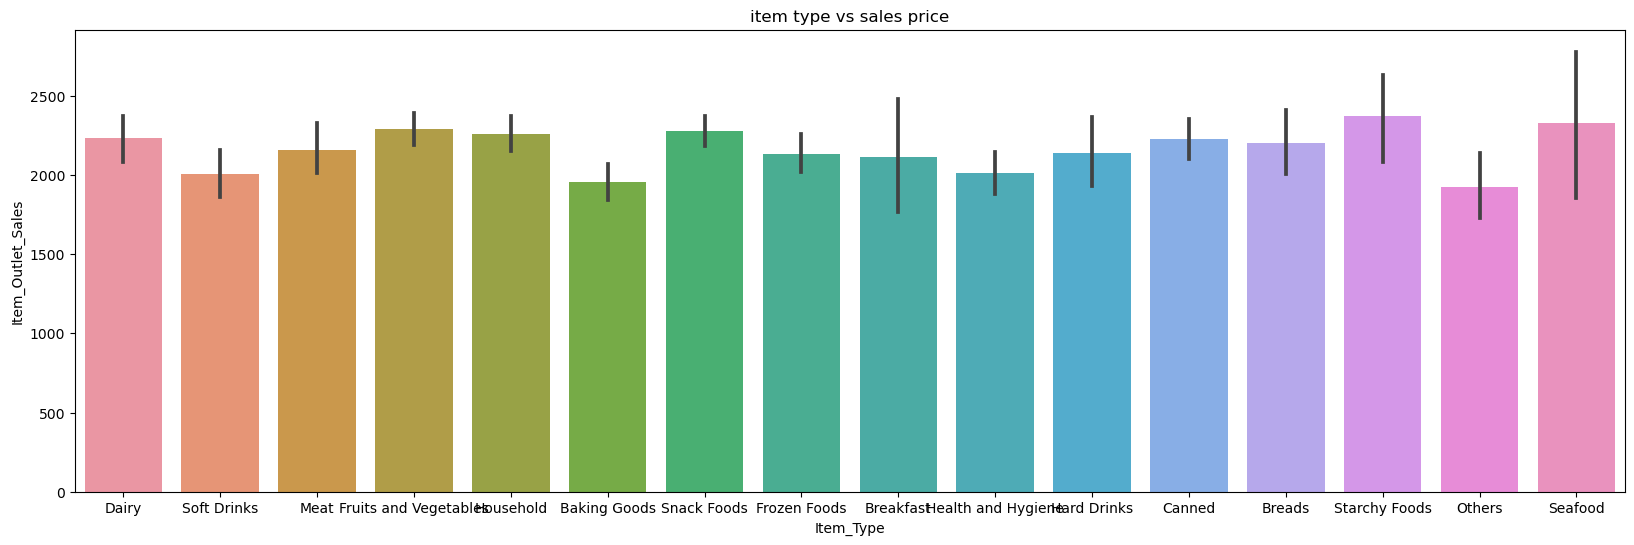

In [765]:
train_data_filename = 'Train.csv'
test_data_filename = 'Test.csv'
train_data = pd.read_csv(train_data_filename)
test_data = pd.read_csv(test_data_filename)
np.random.seed(0) 

plt.figure(figsize=(20,6))
plt.title("item type vs sales price")
sns.barplot(x=train_data['Item_Type'], y=train_data['Item_Outlet_Sales'])

<AxesSubplot:title={'center':'outlet type vs sales price'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

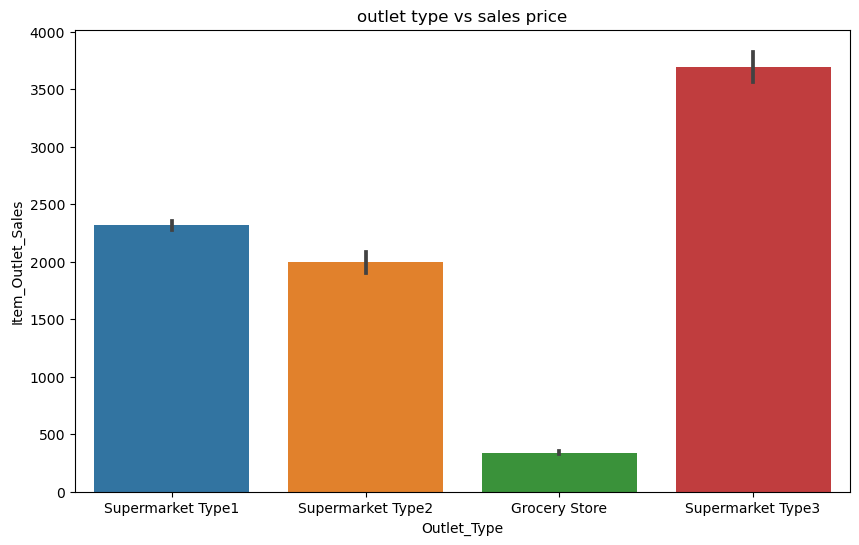

In [766]:
plt.figure(figsize=(10,6))
plt.title("outlet type vs sales price")
sns.barplot(x=train_data['Outlet_Type'], y=train_data['Item_Outlet_Sales'])

<AxesSubplot:title={'center':'Item_Visibility vs sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

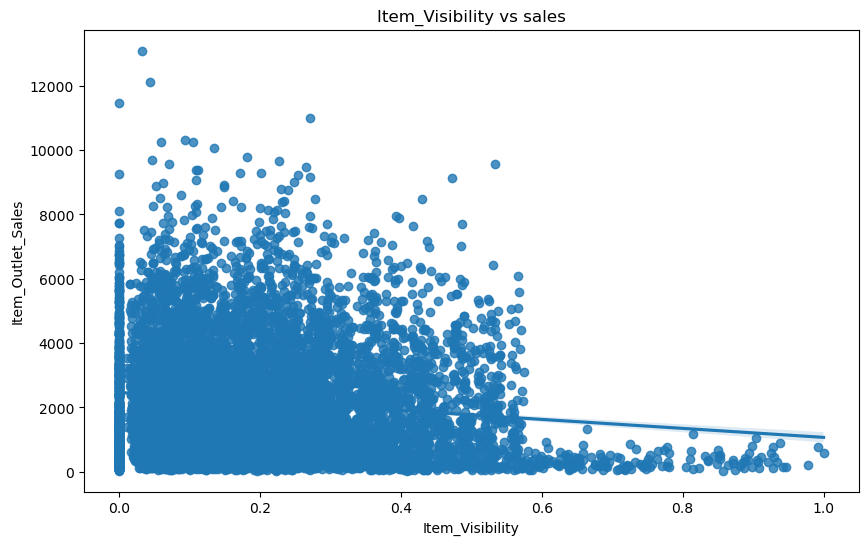

In [767]:
column_to_scale = 'Item_Visibility'
column_data = train_data[[column_to_scale]]
scaler = MinMaxScaler()
scaled_column_data = scaler.fit_transform(column_data)
train_data[column_to_scale] = scaled_column_data

plt.figure(figsize=(10,6))
plt.title("Item_Visibility vs sales")
sns.regplot(x=train_data['Item_Visibility'], y=train_data['Item_Outlet_Sales'])

<AxesSubplot:title={'center':'outlet location type vs sales price'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

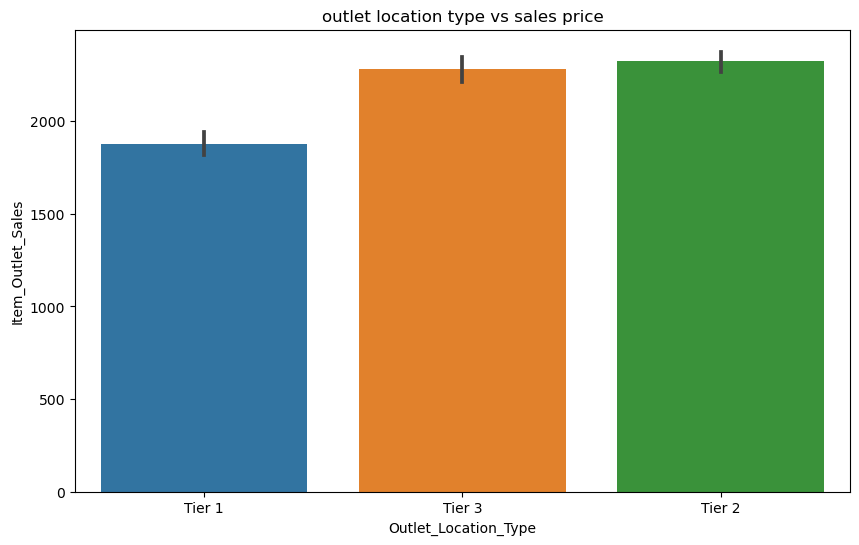

In [768]:
plt.figure(figsize=(10,6))
plt.title("outlet location type vs sales price")
sns.barplot(x=train_data['Outlet_Location_Type'], y=train_data['Item_Outlet_Sales'])

<AxesSubplot:title={'center':'outlet Establishment year vs sales price'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

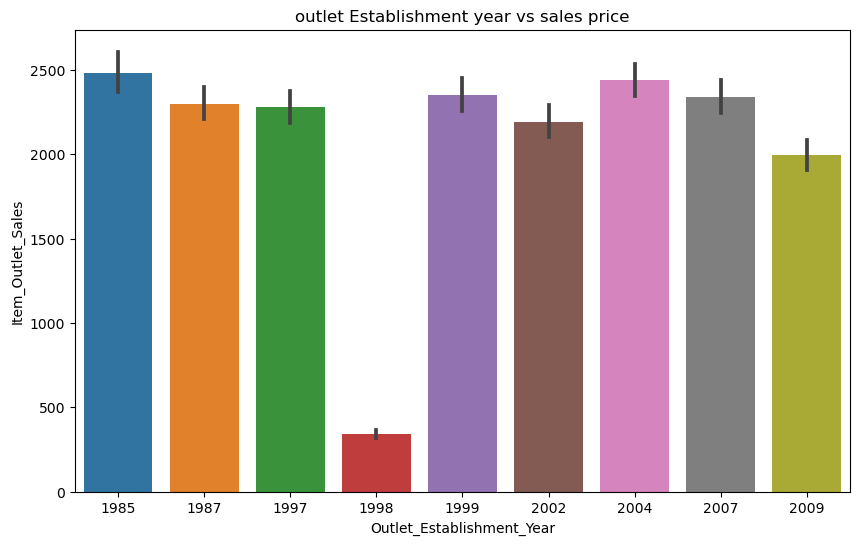

In [769]:
plt.figure(figsize=(10,6))
plt.title("outlet Establishment year vs sales price")
sns.barplot(x=train_data['Outlet_Establishment_Year'], y=train_data['Item_Outlet_Sales'])

In [770]:
column_to_scale = 'Item_MRP'
column_data = train_data[[column_to_scale]]
scaler = MinMaxScaler()
scaled_column_data = scaler.fit_transform(column_data)
train_data[column_to_scale] = scaled_column_data

<AxesSubplot:title={'center':'MRP vs sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

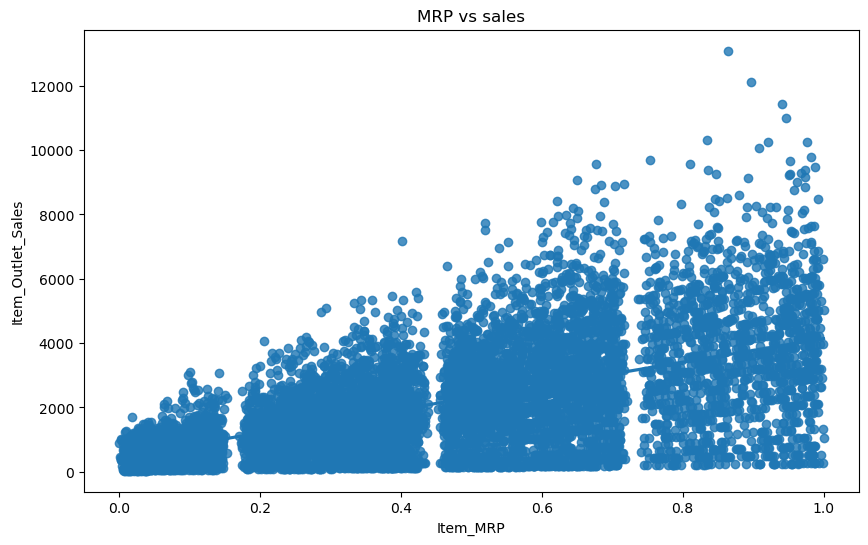

In [771]:
plt.figure(figsize=(10,6))
plt.title("MRP vs sales")
sns.regplot(x=train_data['Item_MRP'], y=train_data['Item_Outlet_Sales'])

In [772]:
scaler = preprocessing.MinMaxScaler()
selected_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
scaled_columns = scaler.fit_transform(train_data[selected_columns])
train_data[selected_columns] = scaled_columns

scaled_columns = scaler.fit_transform(test_data[selected_columns])
test_data[selected_columns] = scaled_columns

In [773]:
missing_values_count = train_data.isnull().sum()
total_cells = np.product(train_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing, missing_values_count)

3.786812155344362 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [774]:
missing_values_count = test_data.isnull().sum()
total_cells = np.product(test_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing, missing_values_count)

4.131794978476901 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [775]:
column_to_impute = 'Item_Weight'
column_to_fill = 'Outlet_Size'
column_data = train_data[[column_to_impute]]
imputer = SimpleImputer()
imputed_column_data = imputer.fit_transform(column_data)
train_data[column_to_impute] = imputed_column_data
train_data[column_to_fill] = train_data[column_to_fill].fillna(method='bfill').fillna(0)
missing_values_count = train_data.isnull().sum()
missing_values_count

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [776]:
column_to_impute = 'Item_Weight'
column_to_fill = 'Outlet_Size'
column_data = test_data[[column_to_impute]]
imputer = SimpleImputer()
imputed_column_data = imputer.fit_transform(column_data)
test_data[column_to_impute] = imputed_column_data
test_data[column_to_fill] = test_data[column_to_fill].fillna(method='bfill')
test_data['Item_Visibility'] = test_data['Item_Visibility'].replace(0, test_data['Item_Visibility'].mean())
missing_values_count = test_data.isnull().sum()
missing_values_count

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  3
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [777]:
 print(test_data.dtypes)
test_data

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,0.964275,Low Fat,0.023374,Snack Foods,0.323413,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,0.222983,reg,0.118737,Dairy,0.235849,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,0.598095,Low Fat,0.307674,Others,0.894140,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,0.164335,Low Fat,0.047548,Snack Foods,0.524488,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,0.484706,Regular,0.366458,Dairy,0.862069,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,0.353974,Regular,0.041702,Snack Foods,0.466011,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,0.181304,Regular,0.441825,Starchy Foods,0.584637,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,0.324204,Low Fat,0.227194,Health and Hygiene,0.369798,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,0.639774,Regular,0.202955,Canned,0.778487,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [778]:
label_encoder = preprocessing.LabelEncoder()

train_data['Outlet_Location_Type']= label_encoder.fit_transform(train_data['Outlet_Location_Type']) 

train_data['Outlet_Type']= label_encoder.fit_transform(train_data['Outlet_Type'])  

train_data['Outlet_Size']= label_encoder.fit_transform(train_data['Outlet_Size']) 

train_data['Item_Fat_Content']= label_encoder.fit_transform(train_data['Item_Fat_Content'])  

train_data['Item_Identifier']= label_encoder.fit_transform(train_data['Item_Identifier'])

train_data['Item_Type']= label_encoder.fit_transform(train_data['Item_Type'])

train_data['Outlet_Identifier']= label_encoder.fit_transform(train_data['Outlet_Identifier'])


In [779]:
test_data['Outlet_Location_Type']= label_encoder.fit_transform(test_data['Outlet_Location_Type']) 

test_data['Outlet_Type']= label_encoder.fit_transform(test_data['Outlet_Type'])  

test_data['Item_Fat_Content']= label_encoder.fit_transform(test_data['Item_Fat_Content'])

test_data['Outlet_Size'] = test_data['Outlet_Size'].astype(str)
test_data['Outlet_Size']= label_encoder.fit_transform(test_data['Outlet_Size'])

test_data['Item_Identifier']= label_encoder.fit_transform(test_data['Item_Identifier'])

test_data['Item_Type']= label_encoder.fit_transform(test_data['Item_Type'])

test_data['Outlet_Identifier']= label_encoder.fit_transform(test_data['Outlet_Identifier'])

For the model, My hypothesis was that the sales number depends on Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, and Outlet_Establishment_Year. I made an assumption as well that the outlet identifier replies the outlet size so i used the outlet identifier to get more accurate results.

In [780]:
y = train_data.Item_Outlet_Sales
X = train_data.drop(['Item_Identifier', 'Item_Outlet_Sales','Item_Weight', 'Outlet_Size'], axis=1)
X_test = test_data.drop(['Item_Identifier', 'Item_Weight', 'Outlet_Size'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

regr = LinearRegression()
 
regr.fit(X_train, y_train)
regr_preds = regr.predict(X_valid)

test_regr_preds = regr.predict(X_test)

test_data['Item_Outlet_Sales'] = test_regr_preds

regr_mean = mean_absolute_error(y_valid, regr_preds)

regr_mean

924.4398261100594

In [781]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,0.964275,1,0.023374,13,0.323413,9,1999,1,0,1,1909.811023
1,1067,0.222983,4,0.118737,4,0.235849,2,2007,1,1,1,1135.268846
2,1406,0.598095,1,0.307674,11,0.894140,0,1998,1,2,0,2339.442904
3,809,0.164335,1,0.047548,13,0.524488,2,2007,1,1,1,2140.941374
4,1184,0.484706,2,0.366458,4,0.862069,5,1985,1,2,3,5041.514725
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.353974,2,0.041702,13,0.466011,8,1997,2,0,1,2398.353960
5677,306,0.181304,2,0.441825,15,0.584637,3,2009,1,2,2,2992.113078
5678,1412,0.324204,1,0.227194,8,0.369798,7,2002,3,1,1,1769.083748
5679,517,0.639774,2,0.202955,3,0.778487,2,2007,3,1,1,3002.899532


In [782]:
model = RandomForestRegressor()
X_test = test_data.drop(['Item_Identifier', 'Item_Outlet_Sales', 'Item_Weight', 'Outlet_Size'], axis=1)
model.fit(X_train, y_train)
tree_preds = model.predict(X_valid)

test_tree_preds = model.predict(X_test)

test_data['Item_Outlet_Sales'] = test_tree_preds

tree_mean = mean_absolute_error(y_valid, tree_preds)

tree_mean

819.5541281820742

In [783]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,0.964275,1,0.023374,13,0.323413,9,1999,1,0,1,1652.595496
1,1067,0.222983,4,0.118737,4,0.235849,2,2007,1,1,1,1485.992362
2,1406,0.598095,1,0.307674,11,0.894140,0,1998,1,2,0,593.740466
3,809,0.164335,1,0.047548,13,0.524488,2,2007,1,1,1,2542.217482
4,1184,0.484706,2,0.366458,4,0.862069,5,1985,1,2,3,6348.403000
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.353974,2,0.041702,13,0.466011,8,1997,2,0,1,2656.761714
5677,306,0.181304,2,0.441825,15,0.584637,3,2009,1,2,2,2725.618750
5678,1412,0.324204,1,0.227194,8,0.369798,7,2002,3,1,1,1964.875670
5679,517,0.639774,2,0.202955,3,0.778487,2,2007,3,1,1,3658.564342


In [784]:
model = XGBRegressor()
X_test = test_data.drop(['Item_Identifier', 'Item_Outlet_Sales', 'Item_Weight', 'Outlet_Size'], axis=1)

model.fit(X_train, y_train)
xgb_preds = model.predict(X_valid)

test_xgb_preds = model.predict(X_test)

test_data['Item_Outlet_Sales'] = test_xgb_preds

xgb_mean = mean_absolute_error(y_valid, xgb_preds)

xgb_mean

836.4851864654844

In [785]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,0.964275,1,0.023374,13,0.323413,9,1999,1,0,1,1365.123047
1,1067,0.222983,4,0.118737,4,0.235849,2,2007,1,1,1,1393.672729
2,1406,0.598095,1,0.307674,11,0.894140,0,1998,1,2,0,549.101501
3,809,0.164335,1,0.047548,13,0.524488,2,2007,1,1,1,2833.649414
4,1184,0.484706,2,0.366458,4,0.862069,5,1985,1,2,3,6531.969727
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.353974,2,0.041702,13,0.466011,8,1997,2,0,1,2091.644531
5677,306,0.181304,2,0.441825,15,0.584637,3,2009,1,2,2,2435.599121
5678,1412,0.324204,1,0.227194,8,0.369798,7,2002,3,1,1,1840.100098
5679,517,0.639774,2,0.202955,3,0.778487,2,2007,3,1,1,4285.589355


Random Forest Regressor gives the lowest mean absolute error so it is the best model to use